In [ ]:
import pandas as pd
data =pd.read_csv("BostonHousing.csv")

In [3]:

# CRIM: per capita crime rate by town
# ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
# INDUS: proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX: nitric oxides concentration (parts per 10 million)
# RM: average number of rooms per dwelling
# AGE: proportion of owner-occupied units built prior to 1940
# DIS: weighted distances to five Boston employment centres
# RAD: index of accessibility to radial highways
# TAX: full-value property tax rate per $10,000
# PTRATIO: pupil-teacher ratio by town
# B: 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town
# LSTAT: percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
data.shape

(506, 14)

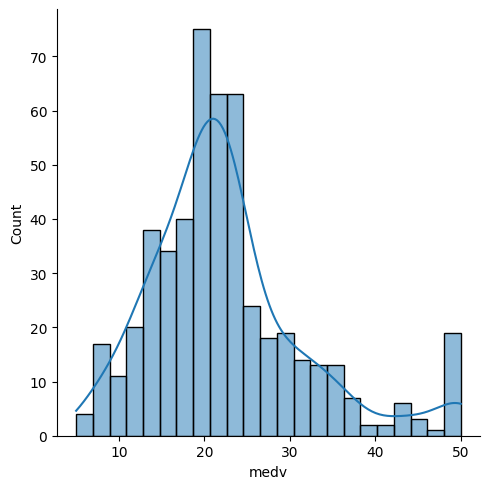

In [7]:
import seaborn as sns
sns.displot(data['medv'], kde=True)

In [8]:
data=data.dropna()
data=data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
data.corr()['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

In [25]:
x=pd.DataFrame(data[["lstat","rm","ptratio","tax","nox","dis","age","indus","zn","crim","chas","rad"]])
y=pd.DataFrame(data["medv"])


In [26]:
x

,lstat,rm,ptratio,tax,nox,dis,age,indus,zn,crim,chas,rad
0,4.98,6.575,15.3,296,0.538,4.0900,65.2,2.31,18.0,0.00632,0,1
1,9.14,6.421,17.8,242,0.469,4.9671,78.9,7.07,0.0,0.02731,0,2
2,4.03,7.185,17.8,242,0.469,4.9671,61.1,7.07,0.0,0.02729,0,2
3,2.94,6.998,18.7,222,0.458,6.0622,45.8,2.18,0.0,0.03237,0,3
4,5.33,7.147,18.7,222,0.458,6.0622,54.2,2.18,0.0,0.06905,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
501,9.67,6.593,21.0,273,0.573,2.4786,69.1,11.93,0.0,0.06263,0,1
502,9.08,6.120,21.0,273,0.573,2.2875,76.7,11.93,0.0,0.04527,0,1
503,5.64,6.976,21.0,273,0.573,2.1675,91.0,11.93,0.0,0.06076,0,1
504,6.48,6.794,21.0,273,0.573,2.3889,89.3,11.93,0.0,0.10959,0,1


In [27]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 12)
(102, 12)
(404, 1)
(102, 1)


In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [31]:
model.intercept_

array([42.47448641])

In [32]:
model.coef_

array([[-5.86384605e-01,  3.45840727e+00, -8.88145328e-01,
        -1.01437602e-02, -2.02242025e+01, -1.51546451e+00,
         7.63334791e-03,  7.22014440e-03,  4.67525319e-02,
        -1.25985033e-01,  3.49045471e+00,  2.56849425e-01]])

In [33]:
y_pred=model.predict(x_test)
y_pred[:5]

array([[25.58325235],
       [27.1137896 ],
       [27.14047364],
       [16.37637761],
       [37.80697187]])

In [34]:
y_pred=pd.DataFrame(y_pred,columns=["predicted"])

In [35]:
y_pred.head()

,predicted
0,25.583252
1,27.113790
2,27.140474
3,16.376378
4,37.806972


In [36]:
df_pred=pd.DataFrame(columns=["actual", "predicted "])
df_pred["actual"]=y_test.reset_index()["medv"]
df_pred["predicted "]=y_pred["predicted"]
df_pred.head()

,actual,predicted
0,23.2,25.583252
1,22.1,27.113790
2,20.6,27.140474
3,17.8,16.376378
4,41.7,37.806972


In [ ]:
from sklearn import metrics
import numpy as np
#the lower the error, the better the model  
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# if r2 increases, the model is better
print("R2", metrics.r2_score(y_test, y_pred))


MAE 4.300122669036365
MSE 30.726065211573893
RMSE 5.5431097058937855
R2 0.6433023932639312


In [ ]:
#we increased the number of features the error decreased and the r2 increased the model is better
#we can also use the statsmodel library to get more information about the model
from sklearn import metrics
import numpy as np
#the lower the error, the better the model  
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# if r2 increases, the model is better
print("R2", metrics.r2_score(y_test, y_pred))


MAE 3.726684881082978
MSE 22.367962894838595
RMSE 4.729478078481662
R2 0.7403312537023212
